<a href="https://colab.research.google.com/github/MohamedKhalidmk/Generative_models/blob/main/BRBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.BernoulliRBM.html#sklearn.neural_network.BernoulliRBM

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.neural_network import BernoulliRBM
import tensorflow.keras as tk
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tk.datasets.mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1) / 255.
x_test = x_test.reshape(x_test.shape[0], -1) / 255.
print(x_train.shape, x_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 784) (10000, 784)


In [ ]:
model = BernoulliRBM(n_components=144, batch_size=32, verbose=1)
model.fit(x_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -102.71, time = 9.26s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -95.27, time = 10.60s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -88.82, time = 10.43s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -89.69, time = 10.51s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -90.22, time = 10.74s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -86.73, time = 10.44s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -85.99, time = 10.46s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -84.25, time = 10.42s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -83.01, time = 10.40s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -84.36, time = 10.48s


BernoulliRBM(batch_size=32, n_components=144, verbose=1)

In [ ]:
model.score_samples(x_test)

array([-4.15026438e-03, -1.70545585e+02, -3.14017824e-01, ...,
       -4.27528048e+01, -2.38299464e-02, -4.24772487e+01])

In [ ]:
def show_digit(original, fake):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.imshow(original.reshape((28,28)),cmap = plt.cm.gray)
    ax1.set_title('Original digit')
    ax2.imshow(fake.reshape((28,28)),cmap = plt.cm.gray)
    ax2.set_title('Sampled digit')
    plt.show()

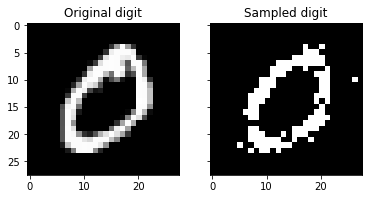

In [ ]:
train_image = x_train[1] # from train distribution
sample_train = model.gibbs(train_image)
show_digit(original=train_image, fake=sample_train)